# Bias, Variance & Noise

Error is equal to Bias squared plus Variance plus irreductible error.  
  
$\large Y = f(X) + \varepsilon $

$\large Err = E[(Y - \hat{f}(X))^2] = [Y - E[\hat{f}(X)]]^2 + E[\hat{f}(X) - E[\hat{f}(X)]]^2 + \varepsilon $

 ![](biasvariance.png)

## Imports

In [1]:
import numpy as np
import pandas as pd
import random
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

## Calculate MSE

$\large \frac{1}{M} \sum_{i=1}^M (y_i-\hat{y_i})^2$

In [2]:
def calc_mse(yh):
    y_ = [y] * nSim
    m = np.mean((y_ - yh)**2)
    return m

## Calculate Bias
$\large (\frac{1}{M} \sum_{i=1}^M \hat{y_i}) - y_i $

In [3]:
def calc_bias(yh):
    bias = np.mean(yh) - y
    return bias
 

## Calculate Variance
$\large \mu = \frac{1}{M} \sum_{i=1}^M \hat{y_i}) $  
  
$\large \frac{1}{M} \sum_{i=1}^M (\hat{y_i} - \mu)^2 $

In [4]:
def calc_var(yh):
    var = np.mean((yh - np.mean(yh))**2)
    return var

## Testing

In [10]:
def get_population():
    size=5000
    x1 = np.random.rand(size)
    x2 = np.random.rand(size)
    x3 = np.random.rand(size)
    x4 = np.random.rand(size)
    x5 = np.random.rand(size)
    
    b0= 1.1; b1=2.2; b2 = 3.3; b3= 4.4; b4=5.5; b5= 6.6
    y = b0 + b1*x1 + b2*(x2**2) + b3*(x3*x4) + b4*x4 + b5*x5 
    random_state=1234
    r = np.random.RandomState(random_state)
    noise = r.normal(-5, 10, size)
    y = y + noise
    df = pd.DataFrame({'target':y, 'X1':x1, 'X2':x2, 'X3':x3, 'X4':x4, 'X5':x5})
    return df

In [13]:
def calculate(model):
    Pred = []
    for i in range(0, nSim):
        D = get_population()
        X = D[['X1', 'X2', 'X3', 'X4', 'X5']]
        Y = D['target']
        model.fit(X,Y)
        pred = model.predict(pd.DataFrame(X_test).T)
        Pred.append(pred)
    return pd.DataFrame(Pred)[0]

def evaluate(pred):
    mse = calc_mse(pred)
    bias = (calc_bias(pred))**2
    var = calc_var(pred)
    return mse,bias,var

In [14]:
np.random.seed(22)
X_test = np.random.rand(5)
y = get_population()['target'][0]

nSim = 100
LM = [] 
DT = []
for dt_depth in range(1,30,3):
    lm = linear_model.LinearRegression()
    pred = calculate(lm)
    res = evaluate(pred)
    LM.append(res)
    
    dt = DecisionTreeRegressor(max_depth = dt_depth)
    pred = calculate(dt)
    res = evaluate(pred)
    DT.append(res)

LM = pd.DataFrame(LM, columns=['Mse', 'Bias', 'Var'])
DT = pd.DataFrame(DT, columns=['Mse', 'Bias', 'Var'])   

In [15]:
LM, DT

(         Mse       Bias       Var
 0  86.723165  86.656809  0.066356
 1  86.260321  86.182286  0.078035
 2  86.888265  86.824553  0.063712
 3  86.572455  86.504079  0.068376
 4  85.509122  85.427284  0.081838
 5  86.125993  86.069331  0.056661
 6  86.583528  86.505424  0.078104
 7  87.102633  87.030949  0.071684
 8  87.254669  87.191163  0.063507
 9  86.456413  86.397337  0.059077,
           Mse        Bias         Var
 0   52.723591   51.827125    0.896466
 1   81.218693   79.146387    2.072306
 2   95.018710   90.222078    4.796632
 3  105.591662   83.900503   21.691159
 4  119.215962   87.592352   31.623610
 5  119.477627   73.612182   45.865445
 6  173.143462   90.618066   82.525396
 7  145.404386   60.873974   84.530411
 8  186.710495   82.479633  104.230862
 9  207.526612  118.417445   89.109167)

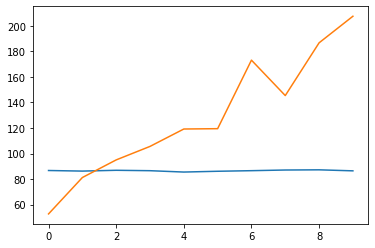

In [16]:
plt.plot(LM['Mse'])
plt.plot(DT['Mse'])
plt.show();

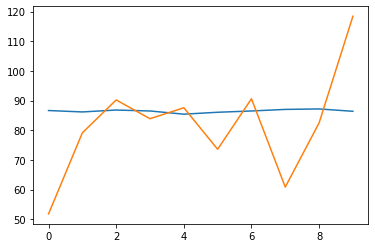

In [17]:
plt.plot(LM['Bias'])
plt.plot(DT['Bias'])
plt.show();

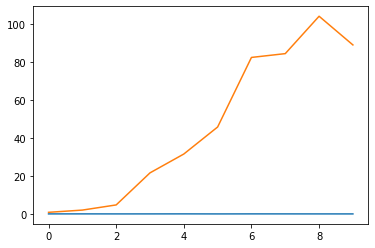

In [18]:
plt.plot(LM['Var'])
plt.plot(DT['Var'])
plt.show();

## Credits & Links

https://towardsdatascience.com/end-your-bias-about-bias-and-variance-67b16f0eb1e6
https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229
https://www3.nd.edu/~rwilliam/stats1/x12.pdf